# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Note that we have gathered a number of useful functions and classes into three companion files:
- traffic_data.py contains functions for loading, handling, and visualizing data
- train_tools.py contains functions for evaluations during training and testing
- html_table.py contains a simple class that makes html formatting of tables within notebooks easy.

In [1]:
### All data functions are contained in a companion file "traffic_data.py"
import traffic_data

In [2]:
data_trn, data_vld = traffic_data.load_data()
data_tst = traffic_data.load_data(train=False)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Run the summary function from traffic_data.py companion file
traffic_data.data_summary(data_trn, data_vld, data_tst)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of unique classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

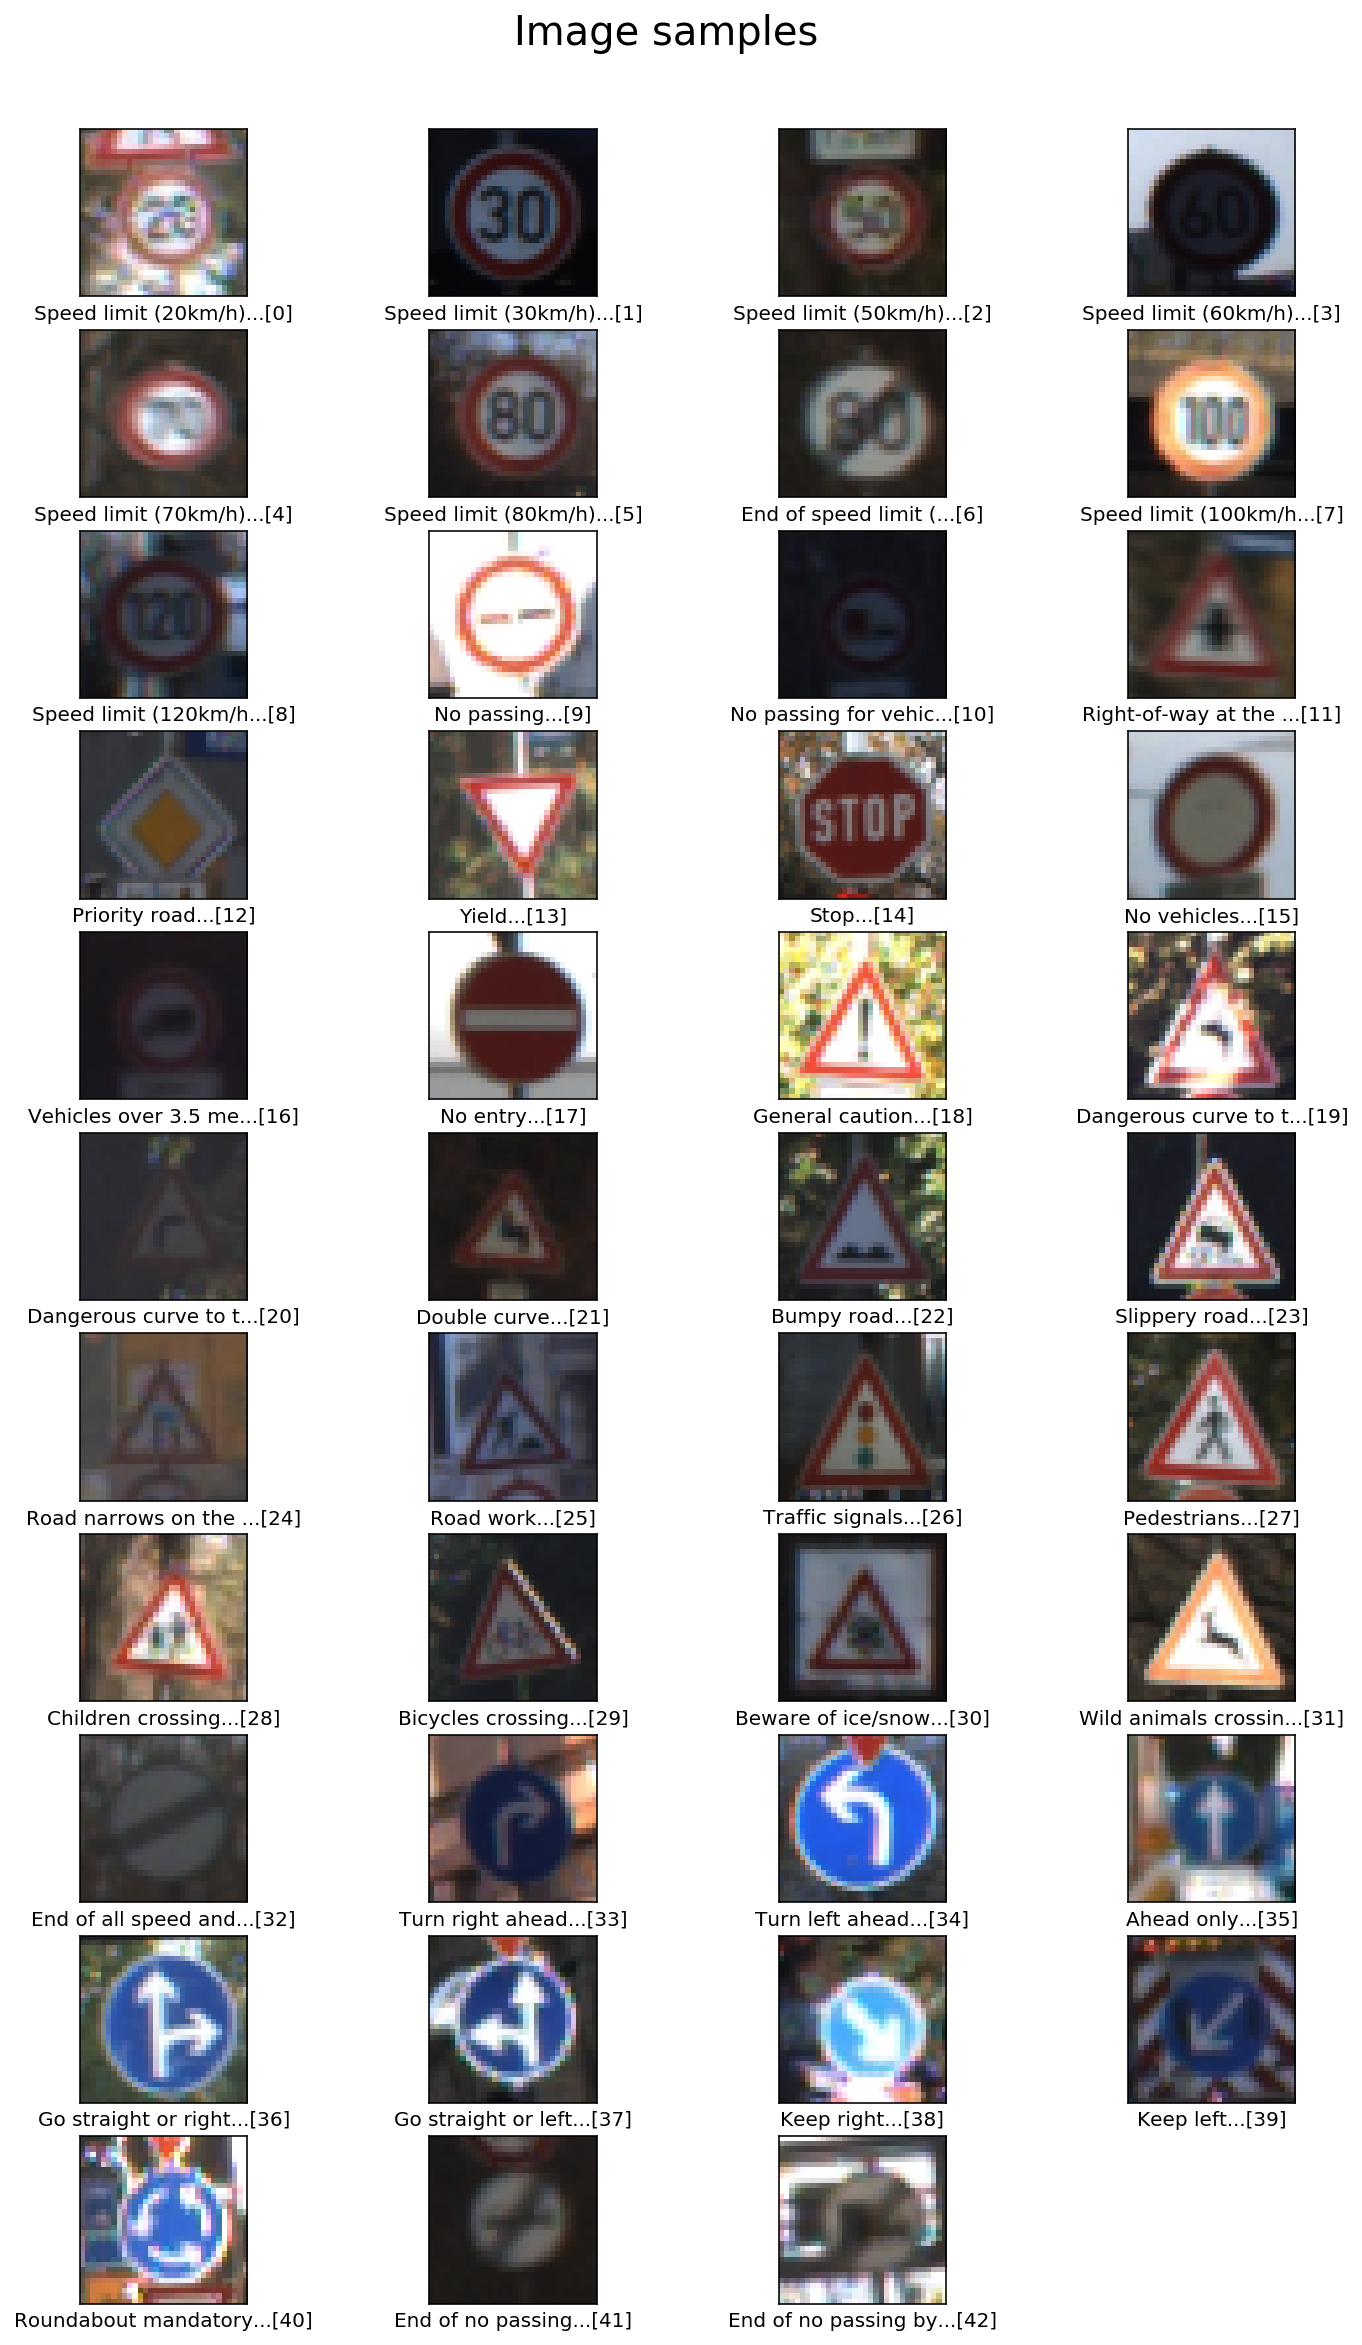

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Plot samples of each of the label categories in a grid
traffic_data.display_image_samples(data_trn)

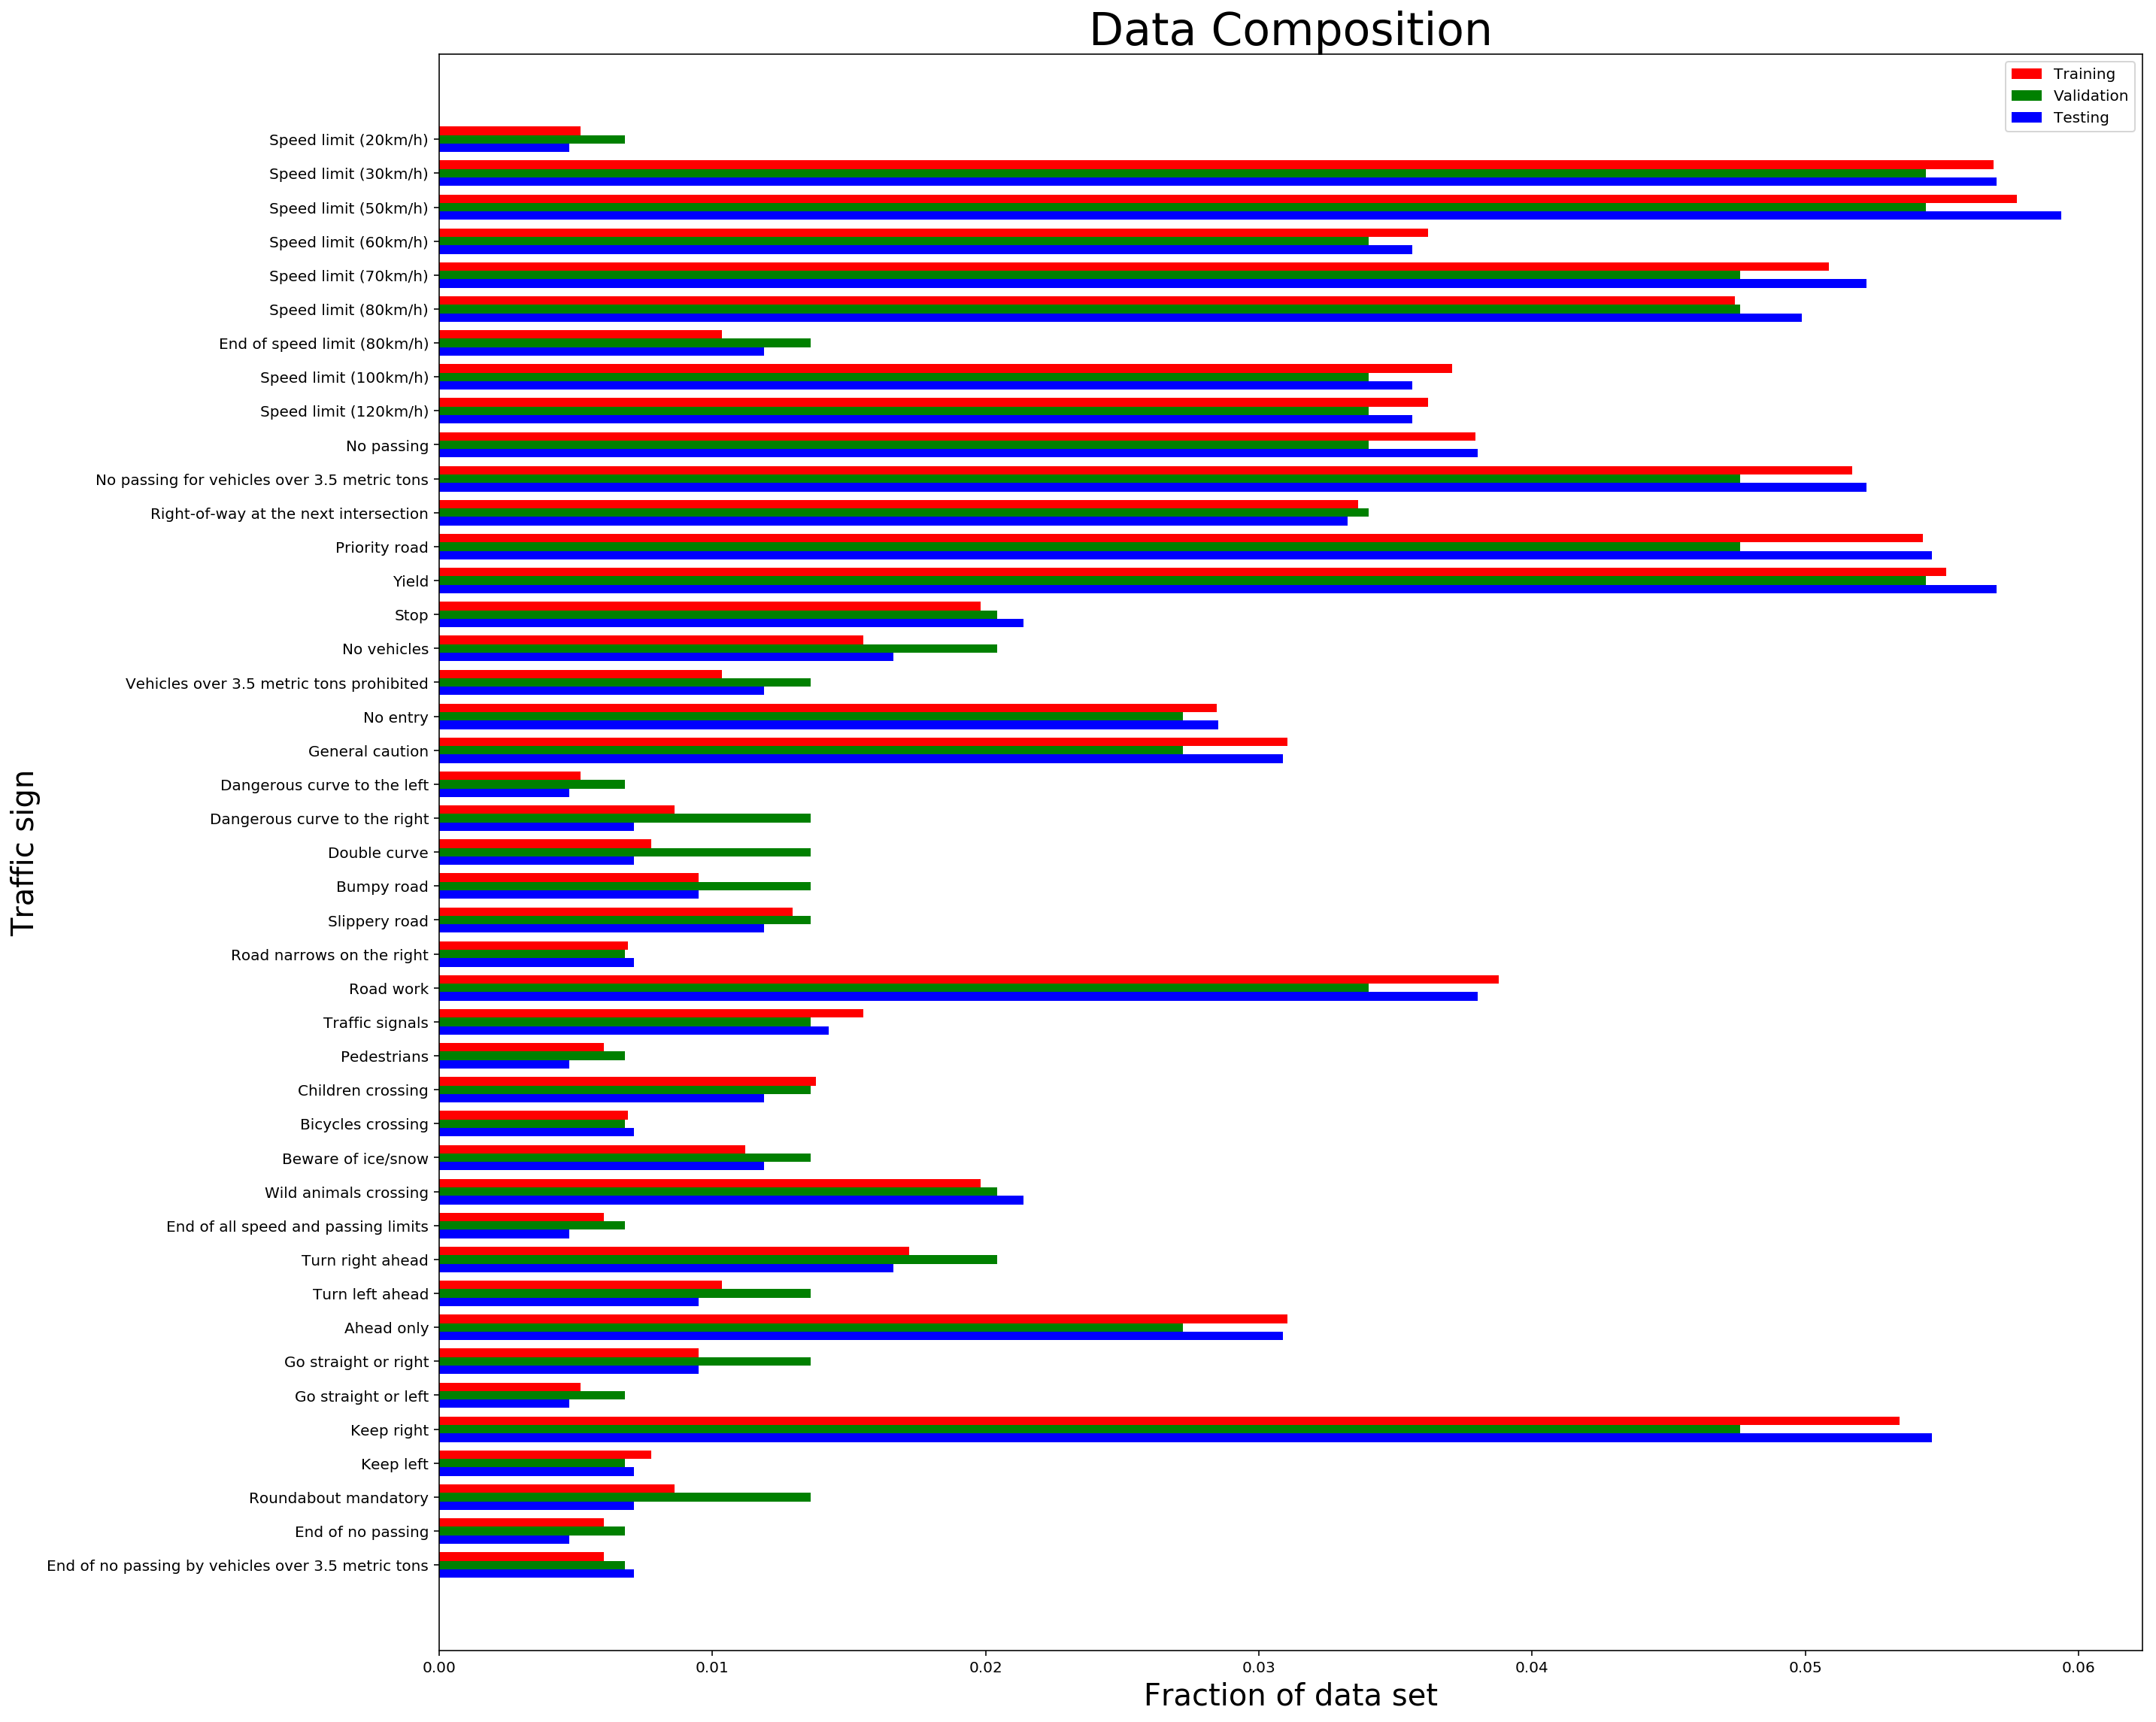

In [5]:
# Plot a bar graph of the composition of the training, validation and testing datasets
#
traffic_data.plot_statistics_y([data_trn, data_vld, data_tst], title="Data Composition", setlabels=["Training", "Validation", "Testing"])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

----
### Data preprocessing is handled via functions found in the traffic_data.py companion file
- The traffic_data.Data() class automatically applies the chosen rescaling function as the training batches are generated
- There are two rescaling modes available
- The function traffic_data.rescale_channel() rescales all image values into the range (-1, +1), with each channel being scaled separately
- The function traffic_data.rescale_flat() rescales all image values into (-1,+1) with all channels scaled simultaneously

### Data augmentation
- In order to improve the results, data augmentation procedures were applied.
- The function traffic_data.generate_batch() applies a series of transformations to the training images
- Transformations include rotation, re-interpolation, and horizontal/vertical shifts
- Two data sets, each equal in size to the initial training set, were generated by applying a random combination of these transformations to the initial training set.
- At training time, these three data sets are combined to form the full training set

### Model Architecture
* This is LeNet with dropout, batch normalization, and an additional depth factor

In [6]:


import train_tools as tt
import tensorflow as tf

def make_network(x, size_logit, rate_retain, norm_switch, depth=1, sigma=0.1):
    mu = 0
    # Layer 1: Convolution, Input = 32x32x3. Output = 28x28x6.
    filt_0 = tf.Variable(tf.truncated_normal([5,5,3,depth*6], mean=mu, stddev=sigma))
    bias_0 = tf.Variable(tf.zeros([depth*6]))
    conv_0 = tf.nn.conv2d(x, filt_0, strides=[1, 1, 1, 1], padding="VALID")
    conv_0 = tf.nn.bias_add(conv_0, bias_0)
    conv_0 = tf.layers.batch_normalization(conv_0, training=norm_switch)
    # Activation:
    conv_0 = tf.nn.relu(conv_0)
    # Pooling: Input = 28x28x6. Output = 14x14x6.
    pool_0 = tf.nn.max_pool(conv_0, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    # Layer 2: Convolution, Output = 10x10x16.
    filt_1 = tf.Variable(tf.truncated_normal([5,5,depth*6,depth*16], mean=mu, stddev=sigma))
    bias_1 = tf.Variable(tf.zeros([depth*16]))
    conv_1 = tf.nn.conv2d(pool_0, filt_1, strides=[1,1,1,1], padding="VALID")
    conv_1 = tf.nn.bias_add(conv_1, bias_1)
    conv_1 = tf.layers.batch_normalization(conv_1, training=norm_switch)
    # Activation:
    conv_1 = tf.nn.relu(conv_1)
    # Pooling: Input = 10x10x16. Output = 5x5x16.
    pool_1 = tf.nn.max_pool(conv_1, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")
    # Flatten: Input = 5x5x16. Output = 400.
    flat_0 = tf.contrib.layers.flatten(pool_1)
    flat_0_shape = flat_0.shape.as_list()
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    wmat_2 = tf.Variable(tf.truncated_normal([flat_0_shape[-1], 120], mean=mu, stddev=sigma))
    bias_2 = tf.Variable(tf.zeros([120]))
    full_0 = tf.add(tf.matmul(flat_0, wmat_2), bias_2)
    full_0 = tf.layers.batch_normalization(full_0, training=norm_switch)
    # Activation:
    full_0 = tf.nn.relu(full_0)
    # Dropout:
    full_0 = tf.nn.dropout(full_0, rate_retain)
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    wmat_3 = tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma))
    bias_3 = tf.Variable(tf.zeros([84]))
    full_1 = tf.add(tf.matmul(full_0, wmat_3), bias_3)
    # Activation:
    full_1 = tf.nn.relu(full_1)
    # Dropout:
    full_1 = tf.nn.dropout(full_1, rate_retain)
    # Layer 5: Fully Connected. Input = 84. Output = size_logit.
    wmat_4 = tf.Variable(tf.truncated_normal([84, size_logit], mean=mu, stddev=sigma))
    bias_4 = tf.Variable(tf.zeros([size_logit]))
    logits = tf.add(tf.matmul(full_1, wmat_4), bias_4, name="logit")
    return logits

def make_placeholders(data):
    data_shape = data.input_shape()
    n_class = data.size_classes()
    with tf.name_scope("input"):
        x = tf.placeholder(tf.float32, [None, *data_shape], name="image")
        y = tf.placeholder(tf.int32, [None], name="label")
        unit_val = tf.constant(1.0, tf.float32)
        rate_retain = tf.placeholder_with_default(unit_val, unit_val.shape, name="rate_retain")
        false_val = tf.constant(False, tf.bool)
        norm_switch = tf.placeholder_with_default(false_val, false_val.shape, name="norm_switch")
    return x, y, rate_retain, norm_switch

def make_trainer(measure_loss, rate_learn, decay_rate=0.975, decay_base=10000):
    global_step = tf.Variable(0, dtype=tf.int32, trainable=False)
    rate_current = tf.train.exponential_decay(rate_learn, global_step, decay_base, decay_rate, staircase=True)
    updates = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(updates):
        trainer = tf.train.AdamOptimizer(rate_current).minimize(measure_loss, global_step=global_step)
    return trainer


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [7]:
### Training loop
### We use facilities from the train_tools companion file for evaluation

def train_model(data_train, data_valid, n_epoch, size_batch, rate_learn, rate_retain, dumppath="./checkpoint/model.ckpt", n_print=0, accr_save=0.5):
    tt.reset_dumpdir(dumppath)
    tf.reset_default_graph()
    input, label, retain, norm = make_placeholders(data_train)
    logit = make_network(input, data_train.size_classes(), retain, norm, depth=2, sigma=0.05)
    loss, accr = tt.make_measures(logit, label)
    data_train.shuffle()
    saver = tf.train.Saver(max_to_keep=2)
    n_batch = data_train.batch_count(size_batch)
    trainer = make_trainer(loss, rate_learn, decay_base=5*n_batch)
    if n_print <= 0: n_print = max(n_batch//10, 1)
    loss_peak, accr_peak = None, None
    with tf.Session() as TS:
        TS.run(tf.global_variables_initializer())
        term = tt.Terminator()
        for i in range(n_epoch):
            b = 0
            for dx,dy, _ in data_train.make_batches(size_batch):
                feed = {
                    input: dx,
                    label: dy,
                    retain: rate_retain,
                    norm: True
                }
                TS.run(trainer, feed_dict=feed)
                feed.pop(retain)
                feed.pop(norm)
                loss_v, accr_v = TS.run([loss, accr], feed_dict=feed)
                b += 1
                if b % n_print == 0: 
                    print(tt.train_string.format(i+1, n_epoch, b, n_batch, loss_v, accr_v))
            loss_valid, accr_valid = tt.evaluate(TS, loss, accr, data_valid, size_batch)
            print(tt.valid_string.format(i+1, n_epoch, loss_valid, accr_valid))
            if term.terminate(accr_valid): break
            if accr_valid >= accr_save:
                if term.new_best():
                    loss_peak, accr_peak = loss_valid, accr_valid
                    save_path = saver.save(TS, dumppath, global_step=term.current_step())
                    print("Model saved to {}".format(save_path))
        return loss_peak, accr_peak


In [8]:
# Load base training and validation data
# Load pre-computed augmented data into training set

data_trn, data_vld = traffic_data.load_data()
data_trn = traffic_data.augment_data(data_trn, ["./data/augment_0.p", "./data/augment_1.p"])

In [9]:
## Train model
## Hyperparameters:
size_epoch = 100
size_batch = 256
rate_learn = 0.00397
rate_retain = 0.52759
save_lim = 0.92
loss_v, accr_v = train_model(data_trn, data_vld, size_epoch, size_batch, rate_learn, rate_retain, accr_save=save_lim)
print("Final Validation: loss = {:>3.5f}, accuracy = {:>3.5f}".format(loss_v, accr_v)) 

Epoch   1/100 - Batch  40/408 | Training  : loss = 2.44834, accuracy = 0.32812
Epoch   1/100 - Batch  80/408 | Training  : loss = 1.29241, accuracy = 0.60938
Epoch   1/100 - Batch 120/408 | Training  : loss = 0.89866, accuracy = 0.73047
Epoch   1/100 - Batch 160/408 | Training  : loss = 0.67641, accuracy = 0.79688
Epoch   1/100 - Batch 200/408 | Training  : loss = 0.49781, accuracy = 0.83594
Epoch   1/100 - Batch 240/408 | Training  : loss = 0.39283, accuracy = 0.88672
Epoch   1/100 - Batch 280/408 | Training  : loss = 0.32030, accuracy = 0.91016
Epoch   1/100 - Batch 320/408 | Training  : loss = 0.67275, accuracy = 0.82422
Epoch   1/100 - Batch 360/408 | Training  : loss = 0.29321, accuracy = 0.91797
Epoch   1/100 - Batch 400/408 | Training  : loss = 0.27603, accuracy = 0.89453
Epoch   1/100 | Validation: loss = 0.23411, accuracy = 0.92676
Epoch   2/100 - Batch  40/408 | Training  : loss = 0.34856, accuracy = 0.87109
Epoch   2/100 - Batch  80/408 | Training  : loss = 0.30416, accuracy

Epoch  10/100 - Batch 200/408 | Training  : loss = 0.03216, accuracy = 0.98438
Epoch  10/100 - Batch 240/408 | Training  : loss = 0.03375, accuracy = 0.98828
Epoch  10/100 - Batch 280/408 | Training  : loss = 0.02565, accuracy = 0.99609
Epoch  10/100 - Batch 320/408 | Training  : loss = 0.03681, accuracy = 0.98828
Epoch  10/100 - Batch 360/408 | Training  : loss = 0.05875, accuracy = 0.98828
Epoch  10/100 - Batch 400/408 | Training  : loss = 0.02342, accuracy = 1.00000
Epoch  10/100 | Validation: loss = 0.13795, accuracy = 0.96440
Epoch  11/100 - Batch  40/408 | Training  : loss = 0.00909, accuracy = 0.99609
Epoch  11/100 - Batch  80/408 | Training  : loss = 0.02975, accuracy = 0.99219
Epoch  11/100 - Batch 120/408 | Training  : loss = 0.08766, accuracy = 0.97266
Epoch  11/100 - Batch 160/408 | Training  : loss = 0.07543, accuracy = 0.98047
Epoch  11/100 - Batch 200/408 | Training  : loss = 0.05263, accuracy = 0.99219
Epoch  11/100 - Batch 240/408 | Training  : loss = 0.01818, accuracy

Epoch  19/100 | Validation: loss = 0.14582, accuracy = 0.97052
Epoch  20/100 - Batch  40/408 | Training  : loss = 0.00301, accuracy = 1.00000
Epoch  20/100 - Batch  80/408 | Training  : loss = 0.02331, accuracy = 0.99219
Epoch  20/100 - Batch 120/408 | Training  : loss = 0.03637, accuracy = 0.98438
Epoch  20/100 - Batch 160/408 | Training  : loss = 0.02297, accuracy = 0.99609
Epoch  20/100 - Batch 200/408 | Training  : loss = 0.01254, accuracy = 0.99609
Epoch  20/100 - Batch 240/408 | Training  : loss = 0.01675, accuracy = 0.99219
Epoch  20/100 - Batch 280/408 | Training  : loss = 0.01576, accuracy = 0.99609
Epoch  20/100 - Batch 320/408 | Training  : loss = 0.02221, accuracy = 0.99609
Epoch  20/100 - Batch 360/408 | Training  : loss = 0.03178, accuracy = 0.99219
Epoch  20/100 - Batch 400/408 | Training  : loss = 0.00491, accuracy = 1.00000
Epoch  20/100 | Validation: loss = 0.11139, accuracy = 0.97687
Epoch  21/100 - Batch  40/408 | Training  : loss = 0.00477, accuracy = 1.00000
Epoch

Epoch  29/100 - Batch 280/408 | Training  : loss = 0.01521, accuracy = 0.99609
Epoch  29/100 - Batch 320/408 | Training  : loss = 0.01341, accuracy = 0.99609
Epoch  29/100 - Batch 360/408 | Training  : loss = 0.00686, accuracy = 0.99609
Epoch  29/100 - Batch 400/408 | Training  : loss = 0.00180, accuracy = 1.00000
Epoch  29/100 | Validation: loss = 0.08926, accuracy = 0.97868
Model saved to ./checkpoint/model.ckpt-29
Epoch  30/100 - Batch  40/408 | Training  : loss = 0.01553, accuracy = 0.99219
Epoch  30/100 - Batch  80/408 | Training  : loss = 0.00484, accuracy = 1.00000
Epoch  30/100 - Batch 120/408 | Training  : loss = 0.01953, accuracy = 0.98828
Epoch  30/100 - Batch 160/408 | Training  : loss = 0.05539, accuracy = 0.99219
Epoch  30/100 - Batch 200/408 | Training  : loss = 0.02126, accuracy = 0.99609
Epoch  30/100 - Batch 240/408 | Training  : loss = 0.00443, accuracy = 1.00000
Epoch  30/100 - Batch 280/408 | Training  : loss = 0.01699, accuracy = 0.99219
Epoch  30/100 - Batch 320/

Epoch  39/100 - Batch  80/408 | Training  : loss = 0.00798, accuracy = 0.99609
Epoch  39/100 - Batch 120/408 | Training  : loss = 0.00930, accuracy = 0.99609
Epoch  39/100 - Batch 160/408 | Training  : loss = 0.03254, accuracy = 0.98828
Epoch  39/100 - Batch 200/408 | Training  : loss = 0.00883, accuracy = 1.00000
Epoch  39/100 - Batch 240/408 | Training  : loss = 0.00206, accuracy = 1.00000
Epoch  39/100 - Batch 280/408 | Training  : loss = 0.00305, accuracy = 1.00000
Epoch  39/100 - Batch 320/408 | Training  : loss = 0.00218, accuracy = 1.00000
Epoch  39/100 - Batch 360/408 | Training  : loss = 0.00981, accuracy = 0.99609
Epoch  39/100 - Batch 400/408 | Training  : loss = 0.00624, accuracy = 1.00000
Epoch  39/100 | Validation: loss = 0.10134, accuracy = 0.97846
Epoch  40/100 - Batch  40/408 | Training  : loss = 0.03039, accuracy = 0.99219
Epoch  40/100 - Batch  80/408 | Training  : loss = 0.00264, accuracy = 1.00000
Epoch  40/100 - Batch 120/408 | Training  : loss = 0.02711, accuracy

Epoch  48/100 - Batch 320/408 | Training  : loss = 0.00147, accuracy = 1.00000
Epoch  48/100 - Batch 360/408 | Training  : loss = 0.00565, accuracy = 1.00000
Epoch  48/100 - Batch 400/408 | Training  : loss = 0.00158, accuracy = 1.00000
Epoch  48/100 | Validation: loss = 0.08703, accuracy = 0.97868
Epoch  49/100 - Batch  40/408 | Training  : loss = 0.00264, accuracy = 1.00000
Epoch  49/100 - Batch  80/408 | Training  : loss = 0.00935, accuracy = 0.99609
Epoch  49/100 - Batch 120/408 | Training  : loss = 0.03296, accuracy = 0.98438
Epoch  49/100 - Batch 160/408 | Training  : loss = 0.01004, accuracy = 0.99609
Epoch  49/100 - Batch 200/408 | Training  : loss = 0.00174, accuracy = 1.00000
Epoch  49/100 - Batch 240/408 | Training  : loss = 0.02116, accuracy = 0.99219
Epoch  49/100 - Batch 280/408 | Training  : loss = 0.00534, accuracy = 1.00000
Epoch  49/100 - Batch 320/408 | Training  : loss = 0.00238, accuracy = 1.00000
Epoch  49/100 - Batch 360/408 | Training  : loss = 0.00399, accuracy

Epoch  58/100 - Batch 160/408 | Training  : loss = 0.01227, accuracy = 0.99609
Epoch  58/100 - Batch 200/408 | Training  : loss = 0.00274, accuracy = 1.00000
Epoch  58/100 - Batch 240/408 | Training  : loss = 0.00798, accuracy = 0.99609
Epoch  58/100 - Batch 280/408 | Training  : loss = 0.00116, accuracy = 1.00000
Epoch  58/100 - Batch 320/408 | Training  : loss = 0.00286, accuracy = 1.00000
Epoch  58/100 - Batch 360/408 | Training  : loss = 0.00485, accuracy = 0.99609
Epoch  58/100 - Batch 400/408 | Training  : loss = 0.00945, accuracy = 0.99609
Epoch  58/100 | Validation: loss = 0.13066, accuracy = 0.97438
Epoch  59/100 - Batch  40/408 | Training  : loss = 0.00042, accuracy = 1.00000
Epoch  59/100 - Batch  80/408 | Training  : loss = 0.00469, accuracy = 0.99609
Epoch  59/100 - Batch 120/408 | Training  : loss = 0.01123, accuracy = 0.99609
Epoch  59/100 - Batch 160/408 | Training  : loss = 0.02089, accuracy = 0.98828
Epoch  59/100 - Batch 200/408 | Training  : loss = 0.00335, accuracy

In [20]:
## Test model
## Generate also the confusion matrix
import html_table as ht

data_tst = traffic_data.load_data(train=False)
loss_t, accr_t, conf_t = tt.test_model(data_tst, conf_matrix=True)
scores_t = traffic_data.compute_class_scores(conf_t)
score_table = ht.HTMLTable()
score_table.append(["Classname", "Precision", "Recall", "F-score"])
for cls in sorted(scores_t.keys()):
    row = [cls] + [str(round(s, 5)) for s in scores_t[cls]]
    score_table.append(row)

print(tt.test_string.format(loss_t, accr_t))
print()
print("Precision, Recall, and F-score per sign class...")
score_table

Testing: loss = 0.21270, accuracy = 0.96651

Precision, Recall, and F-score per sign class...


Classname,Precision,Recall,F-score
Ahead only,0.99458,0.94103,0.96706
Beware of ice/snow,0.80952,0.68,0.73913
Bicycles crossing,0.95652,0.97778,0.96703
Bumpy road,1.0,0.85833,0.92377
Children crossing,0.85965,0.98,0.91589
Dangerous curve to the left,1.0,0.98333,0.9916
Dangerous curve to the right,0.94737,1.0,0.97297
Double curve,0.86905,0.81111,0.83908
End of all speed and passing limits,0.96774,1.0,0.98361
End of no passing,1.0,0.85,0.91892


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [21]:
### Load new images
web_test = traffic_data.load_augment("./data/web_test.p")
web_data = traffic_data.Data(web_test["features"], web_test["labels"])
predictions = tt.run_predict(web_data, n_top=5)

### Analyze Performance

In [22]:
### Calculate the accuracy for these new images
n, accr = traffic_data.prediction_accuracy(web_data.label, predictions)
print("Test sample accuracy: {:>3.4f} over {} images".format(accr, n))

Test sample accuracy: 0.8571 over 14 images


### Predict the Sign Type for Each Image

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

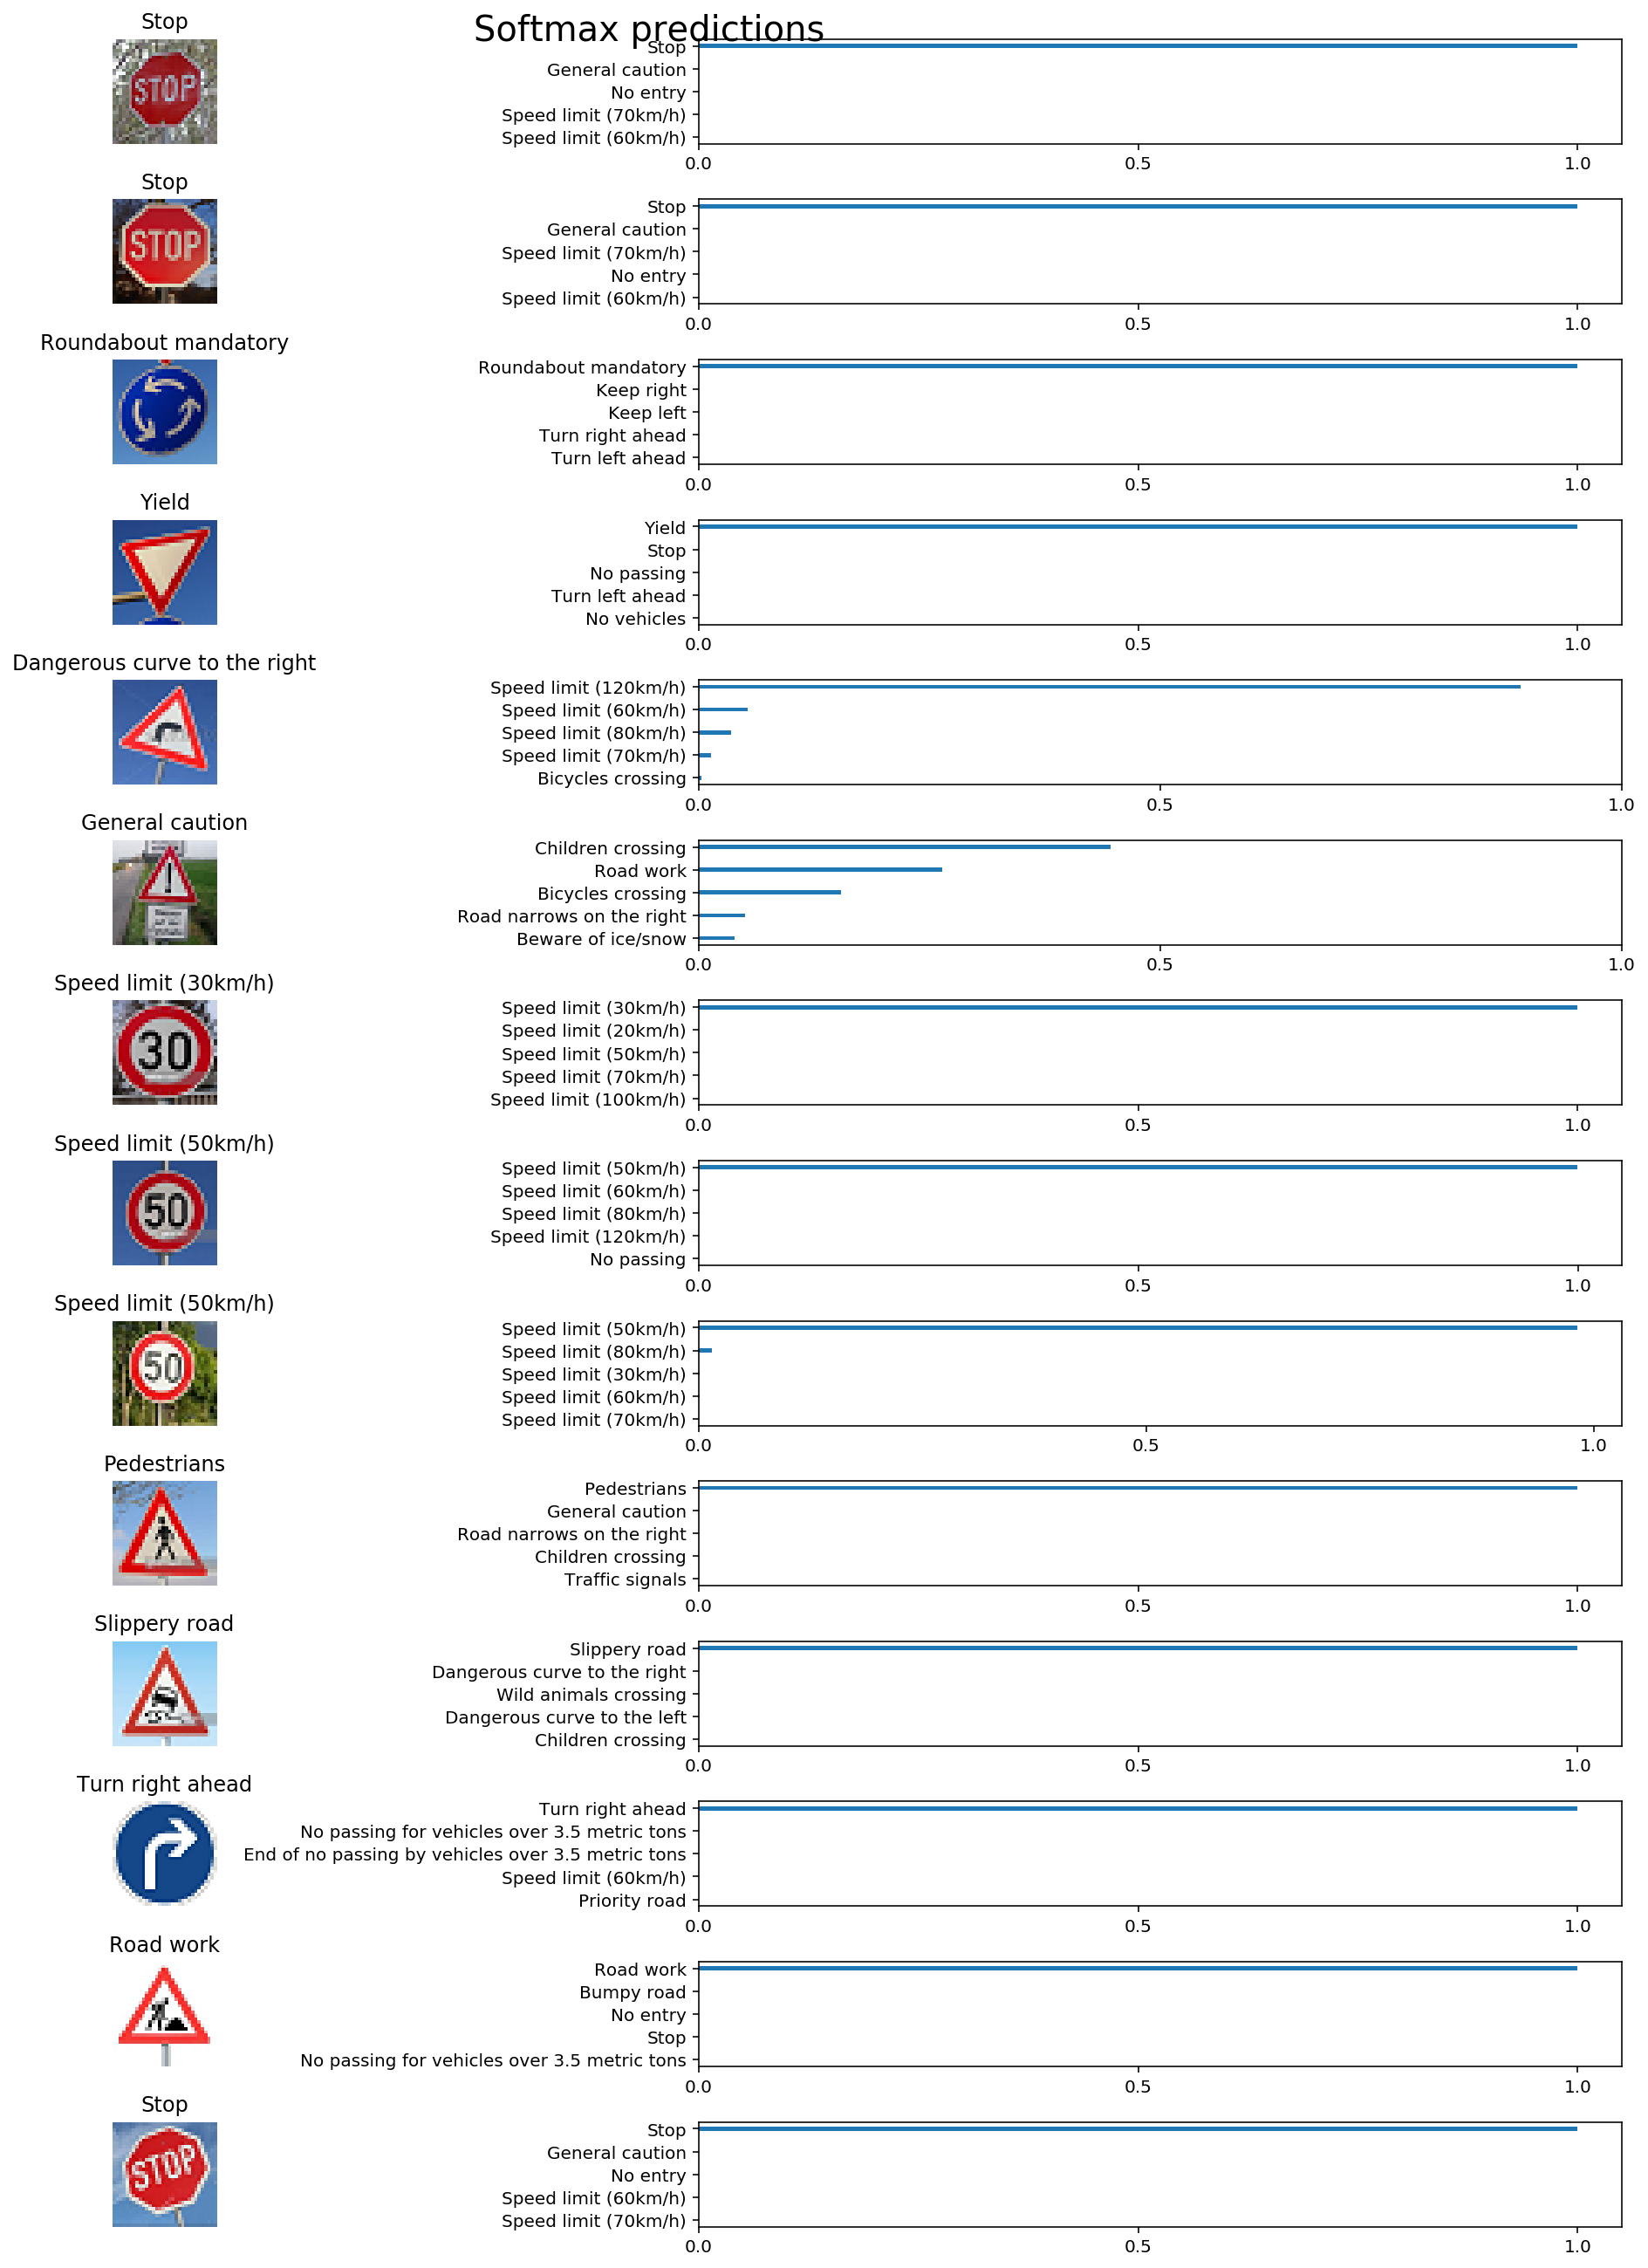

In [24]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
traffic_data.display_predictions(web_data.feature, web_data.label, predictions)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")